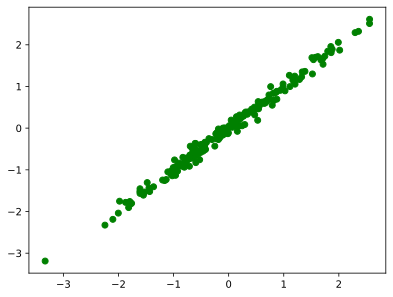

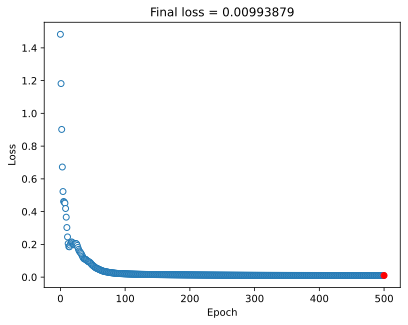

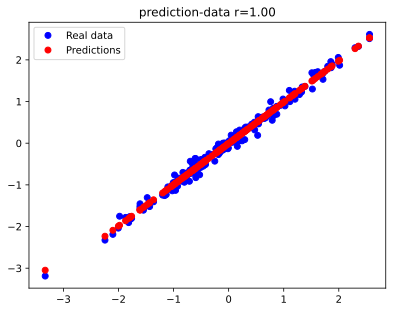

In [151]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

N = 200

torch.manual_seed(1)
x = torch.randn(N,1)
y = x + torch.randn(N,1)/10

plt.plot(x, y, 'o', color='g')
plt.show()

ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
    )

learningRate = .1
lossfun = nn.MSELoss()
optimizer = torch.optim.Adam(ANNreg.parameters(),lr=learningRate)
torch.optim.Adagrad

numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
  yHat = ANNreg(x)

  loss = lossfun(yHat,y)
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

predictions = ANNreg(x)

testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'ro',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [91]:

# Step 1: Generate linear data with noise using PyTorch
torch.manual_seed(42)  # For reproducibility

x = torch.linspace(-1, 1, 100).view(-1, 1)  # Generating linear space and reshaping
noise = torch.randn(x.size()) * 0.2  # Generating random noise
y = 2 * x + 1 + noise  # Linear relation with noise

y.shape

torch.Size([100, 1])

In [135]:
# Step 2: Define a linear ANN model
class LinearANN(nn.Module):
    def __init__(self):
        super(LinearANN, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(1,2),
            nn.ReLU(),
            nn.Linear(2,1)
        )

    def forward(self, x):
        return self.linear(x)

model = LinearANN()
model

LinearANN(
  (linear): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): ReLU()
    (2): Linear(in_features=2, out_features=1, bias=True)
  )
)

Epoch [100/1000], Loss: 1.2052
Epoch [200/1000], Loss: 0.5798
Epoch [300/1000], Loss: 0.2514
Epoch [400/1000], Loss: 0.1441
Epoch [500/1000], Loss: 0.1043
Epoch [600/1000], Loss: 0.0851
Epoch [700/1000], Loss: 0.0727
Epoch [800/1000], Loss: 0.0630
Epoch [900/1000], Loss: 0.0560
Epoch [1000/1000], Loss: 0.0513


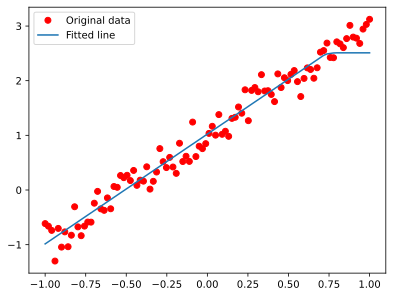

In [94]:
# Step 3: Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Step 4: Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x)
    loss = criterion(outputs, y)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plotting the results
predicted = model(x).detach()
plt.plot(x.numpy(), y.numpy(), 'ro', label='Original data')
plt.plot(x.numpy(), predicted.numpy(), label='Fitted line')
plt.legend()
plt.show()

plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'ro',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()
